In [167]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#import xgboost
from sklearn.model_selection import train_test_split
import seaborn as sb

In [59]:
data=pd.read_csv('Final Randomized Dataset v2.csv')
data.head()
file=pd.read_csv('Final Randomized Dataset v2.csv')
data.head()
data.columns

Index(['Inter-Arrival Time (in secs)', 'Packet Size', 'MCS', 'NB_RB',
       'Application Category '],
      dtype='object')

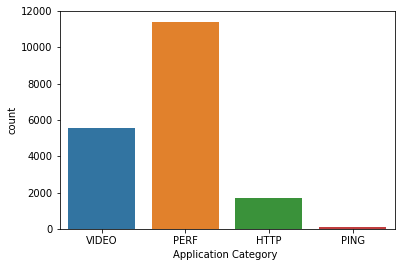

In [165]:
import seaborn as sns
sns.countplot(data['Application Category '],label="Count")
plt.show()

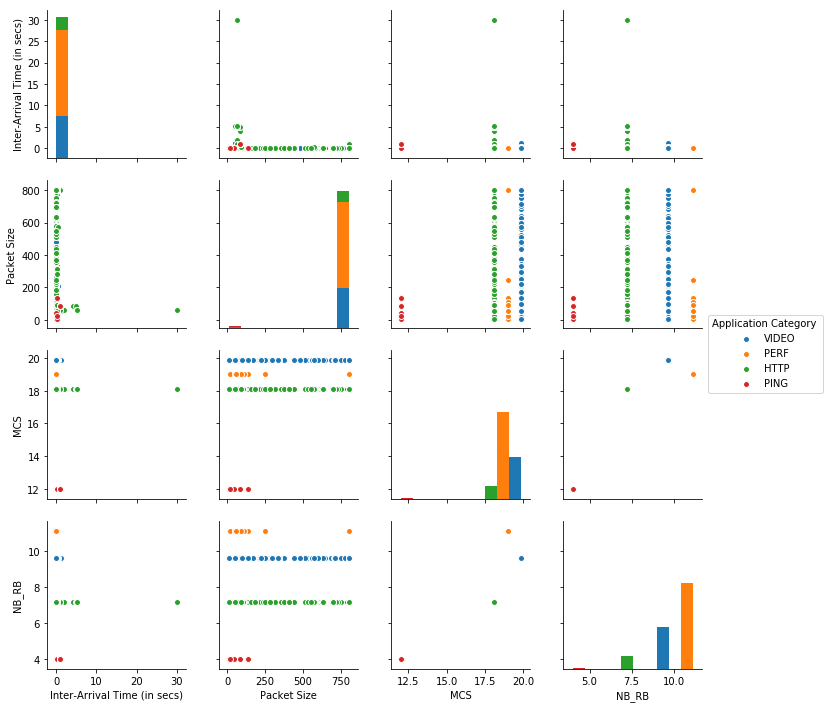

In [185]:
sb.pairplot(data,hue='Application Category ')# kind='scatter')


## Comparing accuracy of different classification algorithms 

In [124]:
#Creating independent and dependent datasets depending on the independent features and dependent labels
Y=data['Application Category ']
X=data[['Inter-Arrival Time (in secs)', 'Packet Size', 'MCS', 'NB_RB']]
#Split the Data into Training and Testing sets with test size as #30%
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, shuffle=True)
classifiers=[]
model2 = svm.SVC()
classifiers.append(model2)
model3 = tree.DecisionTreeClassifier()
classifiers.append(model3)
model4 = RandomForestClassifier()
classifiers.append(model4)
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred= clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
   # print("\n\n")
    print("Confusion Matrix of %s is %s"%(clf, cm))
    print("\nConfusion Matrix \n\n", pd.crosstab(y_train, knn_fit.predict(X_train), rownames=['Actual'], colnames=['Predicted']))
    print("\n\n")

/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is 0.9989297181591152
Confusion Matrix of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is [[ 501    0    0    0]
 [   1 3440    0    0]
 [   0    0   16    0]
 [   5    0    0 1643]]

Confusion Matrix 

 Predicted  HTTP  PERF  PING  VIDEO
Actual                            
HTTP       1164     0     0      6
PERF          1  7964     0      5
PING          2     0    54      2
VIDEO        23     0     0   3859



Accuracy of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, ma

/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Confusion Matrix 

 Predicted  HTTP  PERF  PING  VIDEO
Actual                            
HTTP       1164     0     0      6
PERF          1  7964     0      5
PING          2     0    54      2
VIDEO        23     0     0   3859





## creating decision boundaries for the data 

In [200]:
X_np=X.as_matrix()
Y_np=Y.as_matrix()

/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [209]:
# Create color maps

n_neighbors = 3
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
h=0.02
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf =KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_np, Y_np)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    try:
        x_min, x_max = X_np[:0].min() - 1, X_np[ :0].max() + 1
        y_min, y_max = X_np[: 1].min() - 1, X_np[: 1].max() + 1
    except ValueError: 
        pass
    try:
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
         # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X_np[:, 0], X_np[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
        plt.show()
    
    except ValueError:
        pass



## Logistic regression

In [76]:
X_train, X_test,Y_train, Y_test= train_test_split(X,Y, test_size=0.25)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train, Y_train)
#LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1, penalty='12', randon_state=None, solver='liblinear', tol=0.0001. verbose=0, warm_start=False)
score=lr.score(X_test, Y_test) 
print(score)
from sklearn.model_selection import cross_val_score
crossvalscore=cross_val_score(lr, X, Y, scoring='accuracy', cv=10)
print(crossvalscore)


/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.994220890410959


/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/kuhuhalder/anaconda3/lib/python3.5/site-package

[0.99091395 0.99571964 0.9941145  0.99464955 0.99625268 0.99946467
 0.99143469 0.99411135 0.99089936 1.        ]


In [77]:
accuracy_score(Y_test, lr.predict(X_test))

0.994220890410959

## GaussianNB 

In [72]:
*** --- GaussianNB --- ***

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test= train_test_split(X,Y, test_size=0.25)
gnb=GaussianNB()
gnb.fit(X_train, Y_train)
Y_gnb_score= gnb.predict_proba(X_test)
lr=LogisticRegression()
lr.fit(X_train, Y_train)
Y_lr_score=lr.decision_function(X_test)
Y_lr_score

/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


array([[ -5.11134427,  -6.48997542, -16.46971223,   1.23615725],
       [-16.22392007,   7.25375287, -24.33521756,  -2.91931169],
       [-16.22392049,   7.25375284, -24.33521741,  -2.91931113],
       ...,
       [ -5.15305003,  -6.49291958, -16.45488149,   1.29078994],
       [-16.22392067,   7.25375283, -24.33521735,  -2.9193109 ],
       [ -5.10888454,  -6.48980178, -16.47058692,   1.23293511]])

In [164]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, Y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, Y_test)))

Accuracy of GNB classifier on training set: 1.00
Accuracy of GNB classifier on test set: 1.00


## KNN Algorithm

In [222]:
from sklearn.preprocessing import StandardScaler
#x_vars_stdscle=StandardScaler().fit_transform(X.values)
#x_vars_stdscle
#x_vars_stdscl_df= pd.DataFrame(x_vars_stdscle, index=X.index, columns=X.columns)
from sklearn.preprocessing import LabelEncoder


X_train, X_test, Y_train, Y_test= train_test_split(X, Y, train_size=0.7, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knn_fit= KNeighborsClassifier(n_neighbors=3, p=2, metric='minkowski')
knn_fit.fit(X_train, Y_train)
print("\n K-Nearest Neighbors- Train Confusion Matrix \n\n", pd.crosstab(Y_train, knn_fit.predict(X_train), rownames=['Actual'], colnames=['Predicted']))
print ("\nK-Nearest Neighbors - Train accuracy:",round(accuracy_score(Y_train,knn_fit.predict(X_train)),3))
print("\n K-Nearest Neighbors - Train classification report \n", classification_report(Y_train, knn_fit.predict(X_train)))
print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(Y_test,knn_fit.predict(X_test),rownames = ["Actual"],colnames = ["Predicted"]))      
print ("\nK-Nearest Neighbors - Test accuracy:",round(accuracy_score(Y_test,knn_fit.predict(X_test)),3))
print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(Y_test,knn_fit.predict(X_test)))
y_pred= knn_fit.predict(X_test)
#cm = confusion_matrix(Y_test, y_pred)
#print("Confusion Matrix of %s is\n %s"%(knn_fit, cm))
y_pred = knn_fit.predict(X_test)
print('Misclassified samples: %d' % (Y_test != y_pred).sum())
#print(knn_fit.predict_proba(X_test))
print(knn_fit.score(X_test,Y_test))
print(knn_fit.predict(X_test))

print(knn_fit.kneighbors)


 K-Nearest Neighbors- Train Confusion Matrix 

 Predicted  HTTP  PERF  PING  VIDEO
Actual                            
HTTP       1154     0     0      5
PERF          4  7977     0      5
PING          2     0    51      1
VIDEO        12     0     0   3869

K-Nearest Neighbors - Train accuracy: 0.998

 K-Nearest Neighbors - Train classification report 
               precision    recall  f1-score   support

        HTTP       0.98      1.00      0.99      1159
        PERF       1.00      1.00      1.00      7986
        PING       1.00      0.94      0.97        54
       VIDEO       1.00      1.00      1.00      3881

    accuracy                           1.00     13080
   macro avg       1.00      0.98      0.99     13080
weighted avg       1.00      1.00      1.00     13080



K-Nearest Neighbors - Test Confusion Matrix

 Predicted  HTTP  PERF  PING  VIDEO
Actual                            
HTTP        504     0     0      8
PERF          1  3420     0      4
PING          0    

## Using cross_validation for parameter tuning

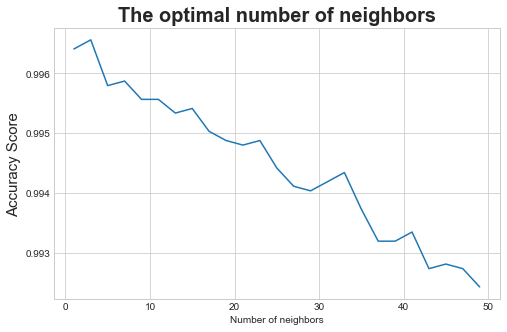

The optimal number of neighbors is 3.


In [221]:
from sklearn.model_selection import cross_val_score
k_list=list(range(1,50,2))
cv_scores=[]
for i in k_list:
    knn=KNeighborsClassifier(n_neighbors=i)
    scores=cross_val_score(knn, X_train, Y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
#MSE=[1-x for x in cv_scores]
plt.figure(figsize=(8,5))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy Score', fontsize=15)
sns.set_style('whitegrid')
plt.plot(k_list, cv_scores)
plt.show()
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)



    

In [219]:
#from sklearn.neighbors import KNeighborsClassifier
KNN_classifier=KNeighborsClassifier()
parameter_grid={'n_neighbors':[1,2,3,4,5]}
model_selection=StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(KNN_classifier, param_grid=parameter_grid, cv=model_selection)
grid_search.fit(X,Y)
print('best_scores:{}'.format(grid_search.best_score_))
print('best parameters:{}'.format(grid_search.best_params_))

best_scores:0.996789039922937
best parameters:{'n_neighbors': 3}


array(['VIDEO', 'PERF', 'PERF', ..., 'PERF', 'PERF', 'PERF'], dtype=object)

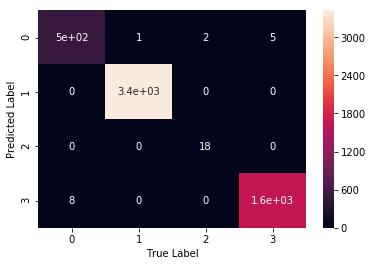

In [183]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_test,y_pred)
sb.heatmap(mat.T, annot=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')


## Tuning the K-value 

In [103]:
 #Tuning of K- value for Train & Test data
dummyarray = np.empty((5,3))
k_valchart = pd.DataFrame(dummyarray)
k_valchart.columns = ["K_value","Train_acc","Test_acc"]

k_vals = [1,2,3,4,5]
for i in range(len(k_vals)):
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski')
    knn_fit.fit(X_train,Y_train)

    print ("\nK-value",k_vals[i])
    
    tr_accscore = round(accuracy_score(Y_train,knn_fit.predict(X_train)),3)
    print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(Y_train,knn_fit.predict(X_train),rownames = ["Actual"],colnames = ["Predicted"]) )     
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore)
    print ("\nK-Nearest Neighbors - Train Classification Report\n",classification_report(Y_train,knn_fit.predict(X_train)))

    ts_accscore = round(accuracy_score(Y_test,knn_fit.predict(X_test)),3)    
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(Y_test,knn_fit.predict(X_test),rownames = ["Actual"],colnames = ["Predicted"]))      
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore)
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(Y_test,knn_fit.predict(X_test)))
    
    k_valchart.loc[i, 'K_value'] = k_vals[i]      
    k_valchart.loc[i, 'Train_acc'] = tr_accscore     
    k_valchart.loc[i, 'Test_acc'] = ts_accscore               


'''# Ploting accuracies over varied K-values
import matplotlib.pyplot as plt
plt.figure()
plt.title('KNN Train & Test Accuracy change with K-value')

plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.plot(k_valchart["K_value"],k_valchart["Train_acc"])
plt.plot(k_valchart["K_value"],k_valchart["Test_acc"])

plt.axis([0.9,5, 0.92, 1.005])
plt.xticks([1,2,3,4,5])

#for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):
    plt.text(a, b, str(b),fontsize=10)

#for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):
    plt.text(a, b, str(b),fontsize=10)
    
plt.legend(loc='upper right')    

plt.show()'''




K-value 1

K-Nearest Neighbors - Train Confusion Matrix

 Predicted  HTTP  PERF  PING  VIDEO
Actual                            
HTTP       1159     0     0      0
PERF          0  7986     0      0
PING          0     0    54      0
VIDEO         0     0     0   3881

K-Nearest Neighbors - Train accuracy: 1.0

K-Nearest Neighbors - Train Classification Report
               precision    recall  f1-score   support

        HTTP       1.00      1.00      1.00      1159
        PERF       1.00      1.00      1.00      7986
        PING       1.00      1.00      1.00        54
       VIDEO       1.00      1.00      1.00      3881

    accuracy                           1.00     13080
   macro avg       1.00      1.00      1.00     13080
weighted avg       1.00      1.00      1.00     13080



K-Nearest Neighbors - Test Confusion Matrix

 Predicted  HTTP  PERF  PING  VIDEO
Actual                            
HTTP        504     0     0      8
PERF          1  3424     0      0
PING         

'# Ploting accuracies over varied K-values\nimport matplotlib.pyplot as plt\nplt.figure()\nplt.title(\'KNN Train & Test Accuracy change with K-value\')\n\nplt.xlabel(\'K-value\')\nplt.ylabel(\'Accuracy\')\nplt.plot(k_valchart["K_value"],k_valchart["Train_acc"])\nplt.plot(k_valchart["K_value"],k_valchart["Test_acc"])\n\nplt.axis([0.9,5, 0.92, 1.005])\nplt.xticks([1,2,3,4,5])\n\n#for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]):\n   plt.text(a, b, str(b),fontsize=10)\n\n#for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]):\n   plt.text(a, b, str(b),fontsize=10)\n   \nplt.legend(loc=\'upper right\')    \n\nplt.show()'

## Decision Tree classifier

In [108]:
(training_inputs,
testing_inputs,
training_classes,
testing_classes)=train_test_split(X,Y,train_size=0.75,random_state=1)
#print(training_inputs)
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# create a decision tree classifier
decision_tree_classifier=DecisionTreeClassifier()

# train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# validate the classifier on the testing set using the classification accuracy

decision_tree_classifier.score(testing_inputs, testing_classes)

1.0

/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: inval

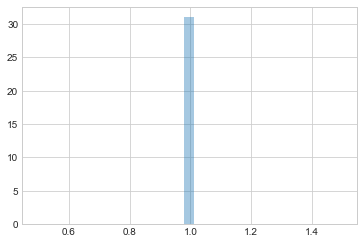

In [230]:
model_accuracy=[]
 
for i in range(1000):
    
    (training_inputs,
    testing_inputs,
    training_classes,
    testing_classes)=train_test_split(X,Y,train_size=0.75, random_state=42)
    decision_tree_classifier=KNeighborsClassifier(n_neighbors=3)
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy=decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracy.append(classifier_accuracy)
sb.distplot(model_accuracy)
plt.show()

/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


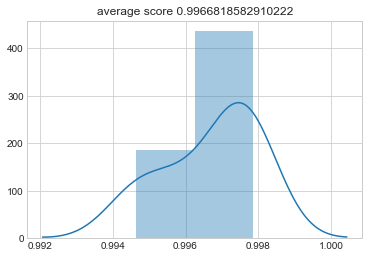

In [229]:
from sklearn.model_selection import cross_val_score
decision_tree_classifier=KNeighborsClassifier()
cv_scores=cross_val_score(decision_tree_classifier,X, Y, cv=10, scoring='accuracy')
sb.distplot(cv_scores)
plt.title('average score {}'.format(np.mean(cv_scores)))
plt.show()

/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/kuhuhalder/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


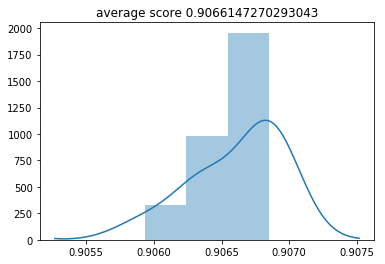

In [133]:
decision_tree_classifier=DecisionTreeClassifier(max_depth=1)#max_depth=1)
cv_scores=cross_val_score(decision_tree_classifier,X, Y, cv=10)
sb.distplot(cv_scores)
plt.title('average score {}'.format(np.mean(cv_scores)))
plt.show()

## Grid Search and Cross-validation 

In [138]:
# grid search= find a range of parameters and find the best set of parameters
# grid search for max_depth and max_features
# no of features to consider 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold # class proportion the same for all folds
# proportion of each class is same for all the classes
# each fold has all the classes
decision_tree_clssifier=DecisionTreeClassifier()

parameter_grid={'max_depth':[1,2,3,4,5],
                'max_features':[1,2,3,4]}
model_selection=StratifiedKFold(n_splits=10)

grid_search=GridSearchCV(decision_tree_classifier,param_grid=parameter_grid,cv=model_selection)
# grid_search gives us the best fit parameters
grid_search.fit(X, Y)
print('best_scores:{}'.format(grid_search.best_score_))
print('best parameters:{}'.format(grid_search.best_params_))

best_scores:1.0
best parameters:{'max_features': 3, 'max_depth': 3}


In [232]:
# visualize how the accuracy changes with different parameters
grid_visual=[]
for grid_pair in grid_search.cv_results_:
    grid_visual.append(grid_pair.cross_val_score)
grid_visual=np.array(grid_visual)
grid_visual.shape=(5,4)
sb.heatmap(grid_visual,cmap='Greens')
plt.ylabel('max_features')
plt.xlabel('max_depth')
plt.show()


AttributeError: 'str' object has no attribute 'cross_val_score'

In [145]:
decision_tree_classifier=grid_search.best_estimator_
decision_tree_classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Grid Search on KNN Classifier 

In [231]:
#from sklearn.neighbors import KNeighborsClassifier
KNN_classifier=KNeighborsClassifier()
parameter_grid={'n_neighbors':[3,4,5]}
model_selection=StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(KNN_classifier, param_grid=parameter_grid, cv=model_selection)
grid_search.fit(X,Y)
print('best_scores:{}'.format(grid_search.best_score_))
print('best parameters:{}'.format(grid_search.best_params_))

best_scores:0.996789039922937
best parameters:{'n_neighbors': 3}


## RandomForest Classifier

In [150]:
# random forest classifier
# creating training decision trees and do classification
from sklearn.ensemble import RandomForestClassifier# what is this 1,2,3,4
random_forest_classifier=RandomForestClassifier()
parameter_grid={'max_features':[1,2,3,4],'n_estimators':[5,10,25,50]}
cross_validation=StratifiedKFold(n_splits=10)
grid_search=GridSearchCV(random_forest_classifier,param_grid=parameter_grid,cv=cross_validation)
grid_search.fit(X,Y)
print('best_scores:{}'.format(grid_search.best_score_))
print('best parameters:{}'.format(grid_search.best_params_))

best_scores:1.0
best parameters:{'n_estimators': 25, 'max_features': 1}


In [148]:
random_forest_classifier.fit(training_inputs, training_classes)
testing_inputs=[[0.008781838, 802,19.86,9.65]]
for input_features, prediction, actual in zip(testing_inputs[:1],random_forest_classifier.predict(testing_inputs[:10]),testing_classes[:1]):
                                             print('{}\t-->\t{}\t(Actual:{})'.format(input_features,prediction, actual))

[0.008781838, 802, 19.86, 9.65]	-->	VIDEO	(Actual:HTTP)


Text(33,0.5,'Predicted Label')

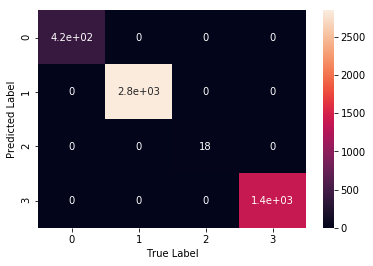

In [153]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y, random_state=0)
model=RandomForestClassifier(n_estimators=25)
model.fit(x_train,y_train)
ypred=model.predict(x_test)
ypred
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,ypred)
sb.heatmap(mat.T, annot=True)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')

In [213]:
data.shape

(18686, 5)

In [214]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')
knn.fit(X_train_std, Y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=knn, test_idx=range(18686,5))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_24.png', dpi=300)
plt.show()

ValueError: query data dimension must match training data dimension